In [2]:
import pandas as pd

df = pd.read_csv("behaviour_simulation_train.csv")  # replace with your actual path

df.head()


,id,date,likes,content,username,media,company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        17331 non-null  int64 
 1   date      17331 non-null  object
 2   likes     17331 non-null  int64 
 3   content   17331 non-null  object
 4   username  17331 non-null  object
 5   media     17331 non-null  object
 6   company   17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


In [4]:
df.isnull().sum()

id          0
date        0
likes       0
content     0
username    0
media       0
company     0
dtype: int64

In [5]:
df.dropna(subset=['content', 'username', 'company', 'likes'], inplace=True)
df['media'].fillna('no_media')
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
df.head()

,id,date,likes,content,username,media,company,has_media,datetime
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46


<Axes: xlabel='likes', ylabel='Count'>

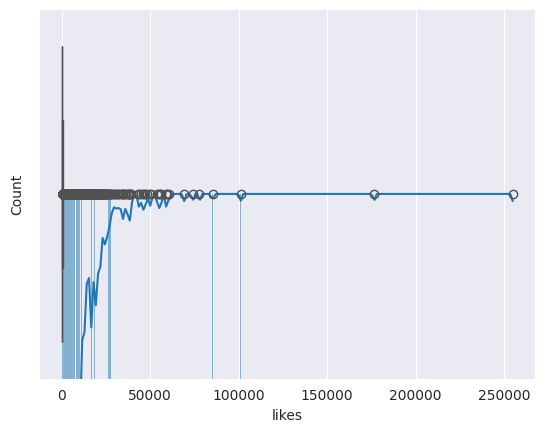

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True)
sns.boxplot(x=df['likes'])

In [8]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.strftime('%b')

In [9]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

In [10]:
df[['id','username','company','likes','day','month','char_count','word_count']].head(100)

,id,username,company,likes,day,month,char_count,word_count
0,1,TimHortonsPH,tim hortons,1,Saturday,Dec,181,29
1,2,IndyMusic,independent,2750,Saturday,Jun,73,10
2,3,CBCCanada,cbc,57,Tuesday,Sep,104,14
3,4,MKWilliamsRome,williams,152,Thursday,Oct,141,22
4,5,BGISD,independent,41,Friday,Oct,199,26
...,...,...,...,...,...,...,...,...
95,96,NoLayingUp,no,1136,Thursday,Aug,218,33
96,97,IndependentNGR,independent,1,Saturday,Sep,80,10
97,98,TD_Canada,td,104,Wednesday,Nov,50,6
98,99,IndependentNGR,independent,0,Friday,Nov,78,11


WordCount Vs Linkes

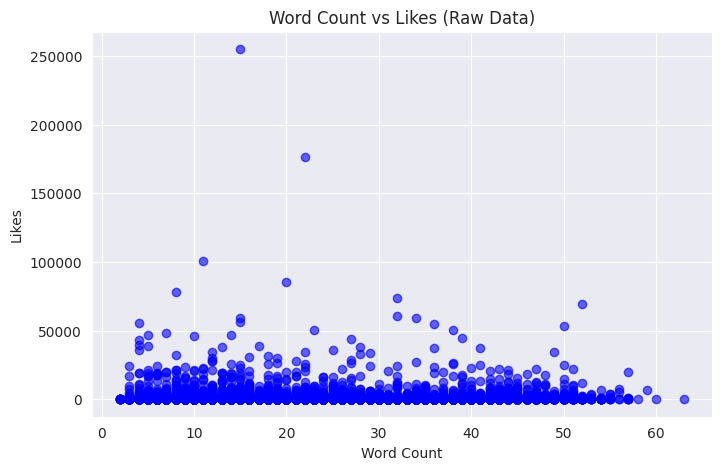

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(df['word_count'], df['likes'], color='blue', alpha=0.6)
plt.title('Word Count vs Likes (Raw Data)')
plt.xlabel('Word Count')
plt.ylabel('Likes')
plt.grid(True)
plt.show()

Grouped Word Count

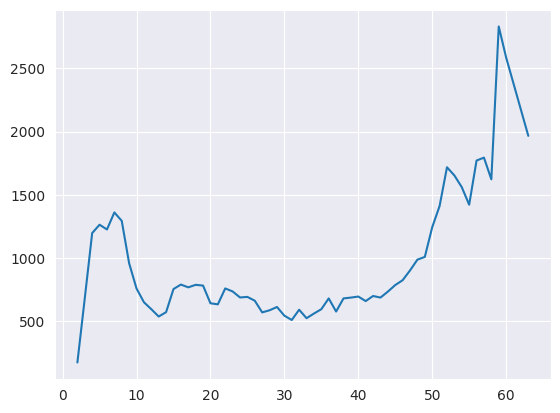

In [12]:
grouped = df.groupby('word_count')['likes'].mean().reset_index()
grouped['likes_smooth'] = grouped['likes'].rolling(window=5, min_periods=1).mean()
plt.plot(grouped['word_count'], grouped['likes_smooth'])


Char Count vs Likes

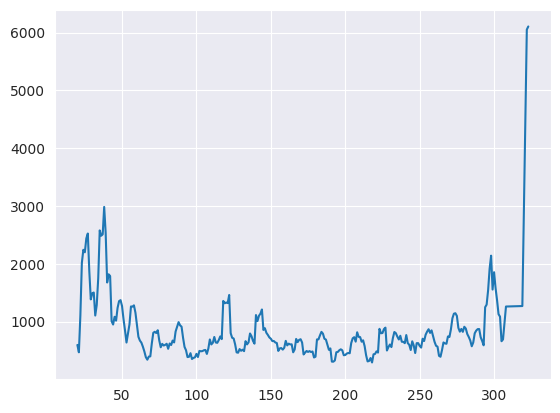

In [13]:
grouped = df.groupby('char_count')['likes'].mean().reset_index()
grouped['likes_smooth'] = grouped['likes'].rolling(window=5, min_periods=1).mean()
plt.plot(grouped['char_count'], grouped['likes_smooth'])


Company And Average Likes

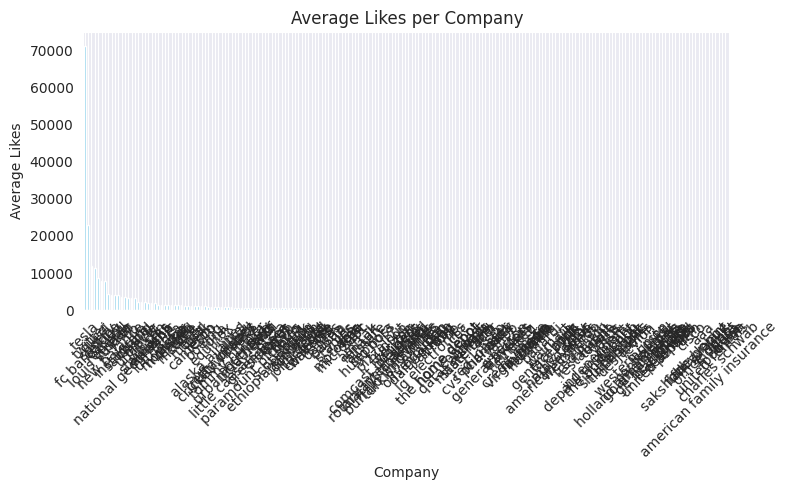

In [14]:
# Group by company and calculate average likes
company_likes = df.groupby('company')['likes'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
company_likes.plot(kind='bar', color='skyblue')
plt.title('Average Likes per Company')
plt.xlabel('Company')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Month V/S like

/tmp/ipykernel_14952/800551713.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_likes = df.groupby('month')['likes'].sum()


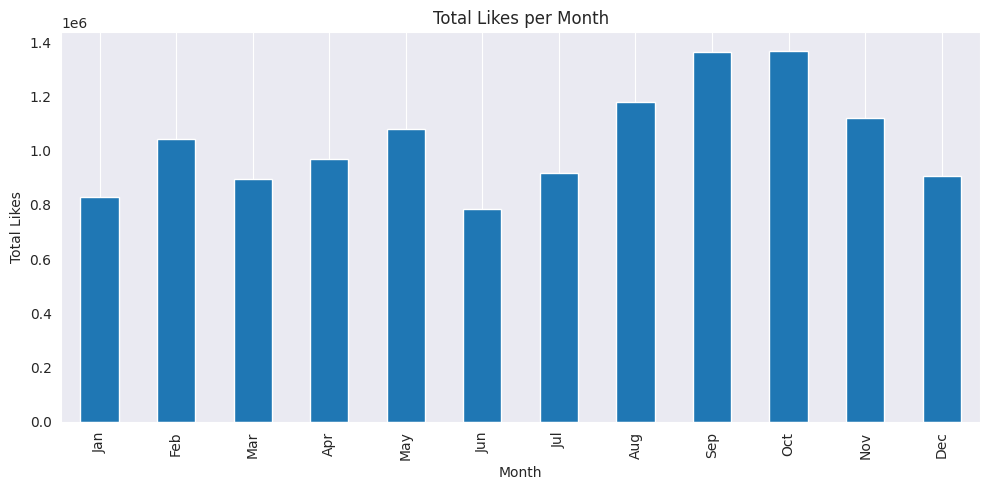

In [15]:
df['month'] = pd.Categorical(df['month'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
monthly_likes = df.groupby('month')['likes'].sum()
monthly_likes.plot(kind='bar', figsize=(10, 5))
plt.title('Total Likes per Month')
plt.xlabel('Month')
plt.ylabel('Total Likes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Hourly Likes

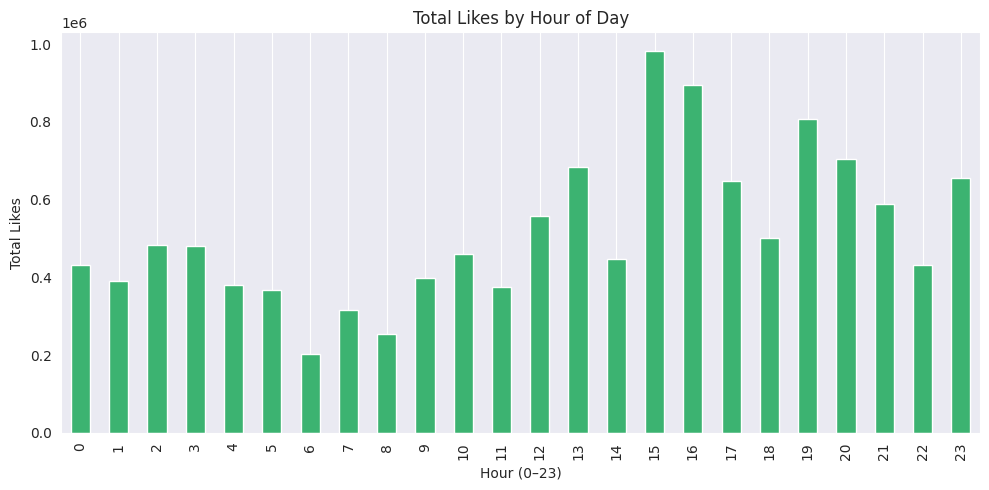

In [16]:
hourly_likes = df.groupby('hour')['likes'].sum()
hourly_likes.plot(kind='bar', figsize=(10, 5), color='mediumseagreen')
plt.title('Total Likes by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Total Likes')
plt.grid(axis='y')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


Sentiments


In [18]:
from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,id,date,likes,content,username,media,company,has_media,datetime,hour,day,month,word_count,char_count,sentiment
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0,Saturday,Dec,29,181,0.1750
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,10,Saturday,Jun,10,73,0.0000
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,19,Tuesday,Sep,14,104,-0.1000
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09,11,Thursday,Oct,22,141,0.5000
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46,14,Friday,Oct,26,199,0.0625


Encode Company

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['company_encoded'] = le.fit_transform(df['company'])

Training Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

X = df[['word_count', 'char_count', 'has_media', 'hour', 'sentiment']]
y = df['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE  (squared=True by default)
mse = mean_squared_error(y_test, preds)

# Taking square root manually to get RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 3574.7005276375494
